In [1]:
import os
import random 
import numpy as np

In [2]:
data_path = "/media/usr/SSD/jitae/Thesis/Neural transformation/z_all/"

In [3]:
a=np.load(data_path+'target_all_epoch1.npy')
b=np.load(data_path+'score_all_epoch1.npy')
c=np.load(data_path+'th_epoch1.npy')
d=np.load(data_path+'z_all_epoch1.npy',allow_pickle=True)



/home/jitae/anaconda3/envs/deepsvdd/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
e=np.load(data_path+'target_all_epoch25.npy')
f=np.load(data_path+'score_all_epoch25.npy')
g=np.load(data_path+'th_epoch25.npy')
h=np.load(data_path+'z_all_epoch25.npy',allow_pickle=True)


In [5]:
i=np.load(data_path+'target_all_epoch50.npy')
j=np.load(data_path+'score_all_epoch50.npy')
k=np.load(data_path+'th_epoch50.npy')
l=np.load(data_path+'z_all_epoch50.npy',allow_pickle=True)

In [6]:
for i in range(len(d)):
    d[i] = d[i].numpy()

In [7]:
for i in range(len(h)):
    h[i] = h[i].numpy()

In [8]:
for i in range(len(l)):
    l[i] = l[i].numpy()

In [9]:
d_1= np.concatenate(d)
h_1= np.concatenate(h)
l_1= np.concatenate(l)

In [10]:
d_1.shape

(133, 11, 32)

In [11]:
h_1.shape

(133, 11, 32)

In [12]:
import pandas as pd

In [13]:
label = pd.DataFrame({"label":[0,1,2,3,4,5,6,7,8,9,10]})
final_zs_2 = pd.DataFrame()
for i in range(d_1.shape[0]) :
    tmp = pd.DataFrame(d_1[i,::])
    tmp = pd.concat([tmp,label],axis=1)
    final_zs_2 = final_zs_2.append(tmp)

/tmp/ipykernel_3740913/2205935118.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_zs_2 = final_zs_2.append(tmp)
/tmp/ipykernel_3740913/2205935118.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_zs_2 = final_zs_2.append(tmp)
/tmp/ipykernel_3740913/2205935118.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_zs_2 = final_zs_2.append(tmp)
/tmp/ipykernel_3740913/2205935118.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_zs_2 = final_zs_2.append(tmp)
/tmp/ipykernel_3740913/2205935118.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

In [14]:
final_zs_2 = final_zs_2.reset_index(drop=True)

In [15]:
# sample
final_zs_sample_2 = final_zs_2.drop('label', axis=1)

In [16]:
final_zs_sample_2.shape

(1463, 32)

In [17]:
final_zs_label_2 = pd.DataFrame(final_zs_2['label'])

In [18]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3)
pca.fit(final_zs_sample_2) 
pca_features_2 = pca.fit_transform(final_zs_sample_2)
 
print('Shape before PCA: ', final_zs_sample_2.shape)
print('Shape after PCA: ', pca_features_2.shape)
 
pca_df_2 = pd.DataFrame(
    data=pca_features_2, 
    columns=['PC1', 'PC2', 'PC3'])

Shape before PCA:  (1463, 32)
Shape after PCA:  (1463, 3)


In [19]:
pca_df_2.shape

(1463, 3)

In [20]:
target_names = {
    0:'untransformed',
    1:'t1', 
    2:'t2',
    3:'t3',
    4:'t4',
    5:'t5',
    6:'t6',
    7:'t7',
    8:'t8',
    9:'t9',
    10:'t10',
}

In [21]:
pca_df_2['target'] = final_zs_label_2['label']
pca_df_2['target'] = pca_df_2['target'].map(target_names)

In [22]:
import matplotlib.pyplot as plt

In [23]:
pca_df_2['target']=pd.Categorical(pca_df_2['target'])
my_color=pca_df_2['target'].cat.codes

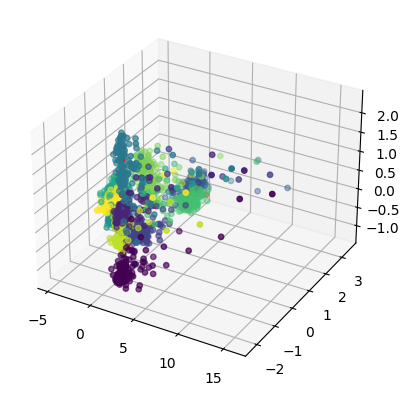

In [24]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_2['PC1'][:-10], pca_df_2['PC2'][:-10], pca_df_2['PC3'][:-10],  c=my_color[:-10] , s=15)
ax.scatter(pca_df_2['PC1'][-10:], pca_df_2['PC2'][-10:], pca_df_2['PC3'][-10:],  c='red' , s=15)
#ax.scatter(pca_df_2['PC1'], pca_df_2['PC2'], pca_df_2['PC3'],  c=my_color, s=15)
# label the axes
#ax.legend()
#ax.set_xlabel("PC1")
#ax.set_ylabel("PC2")
#ax.set_zlabel("PC3")
#ax.set_title("PCA on Z-space")
plt.show()

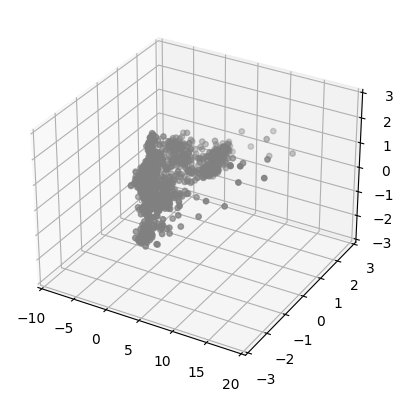

In [25]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_2['PC1'][:-10], pca_df_2['PC2'][:-10], pca_df_2['PC3'][:-10],  c='gray' , s=15)
ax.set_xlim3d(-10,20 )
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)
#ax.scatter(pca_df_2['PC1'], pca_df_2['PC2'], pca_df_2['PC3'],  c=my_color, s=15)
# label the axes
#ax.legend()
#ax.set_xlabel("PC1")
#ax.set_ylabel("PC2")
#ax.set_zlabel("PC3")
#ax.set_title("PCA on Z-space")
plt.show()

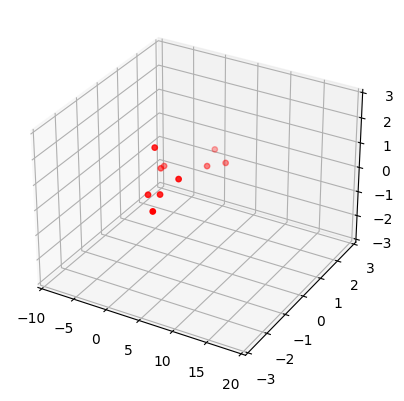

In [27]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(pca_df_2['PC1'][:-10], pca_df_2['PC2'][:-10], pca_df_2['PC3'][:-10],  c=my_color[:-10] , s=15)
ax.scatter(pca_df_2['PC1'][-10:], pca_df_2['PC2'][-10:], pca_df_2['PC3'][-10:],  c='red' , s=15)
ax.set_xlim3d(-10,20 )
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)
#ax.scatter(pca_df_2['PC1'], pca_df_2['PC2'], pca_df_2['PC3'],  c=my_color, s=15)
# label the axes
#ax.legend()
#ax.set_xlabel("PC1")
#ax.set_ylabel("PC2")
#ax.set_zlabel("PC3")
#ax.set_title("PCA on Z-space")
plt.show()

In [28]:
label = pd.DataFrame({"label":[0,1,2,3,4,5,6,7,8,9,10]})
final_zs_2 = pd.DataFrame()
for i in range(l_1.shape[0]) :
    tmp = pd.DataFrame(l_1[i,::])
    tmp = pd.concat([tmp,label],axis=1)
    final_zs_2 = final_zs_2.append(tmp)

/tmp/ipykernel_3740913/3375172338.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_zs_2 = final_zs_2.append(tmp)
/tmp/ipykernel_3740913/3375172338.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_zs_2 = final_zs_2.append(tmp)
/tmp/ipykernel_3740913/3375172338.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_zs_2 = final_zs_2.append(tmp)
/tmp/ipykernel_3740913/3375172338.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_zs_2 = final_zs_2.append(tmp)
/tmp/ipykernel_3740913/3375172338.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

In [29]:
final_zs_2 = final_zs_2.reset_index(drop=True)

In [30]:
# sample
final_zs_sample_2 = final_zs_2.drop('label', axis=1)

In [31]:
final_zs_sample_2.shape

(1463, 32)

In [32]:
final_zs_label_2 = pd.DataFrame(final_zs_2['label'])

In [33]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3)
pca.fit(final_zs_sample_2) 
pca_features_2 = pca.fit_transform(final_zs_sample_2)
 
print('Shape before PCA: ', final_zs_sample_2.shape)
print('Shape after PCA: ', pca_features_2.shape)
 
pca_df_2 = pd.DataFrame(
    data=pca_features_2, 
    columns=['PC1', 'PC2', 'PC3'])

Shape before PCA:  (1463, 32)
Shape after PCA:  (1463, 3)


In [34]:
pca_df_2.shape

(1463, 3)

In [35]:
target_names = {
    0:'untransformed',
    1:'t1', 
    2:'t2',
    3:'t3',
    4:'t4',
    5:'t5',
    6:'t6',
    7:'t7',
    8:'t8',
    9:'t9',
    10:'t10',
}

In [36]:
pca_df_2['target'] = final_zs_label_2['label']
pca_df_2['target'] = pca_df_2['target'].map(target_names)

In [37]:
import matplotlib.pyplot as plt

In [38]:
pca_df_2['target']=pd.Categorical(pca_df_2['target'])
my_color=pca_df_2['target'].cat.codes

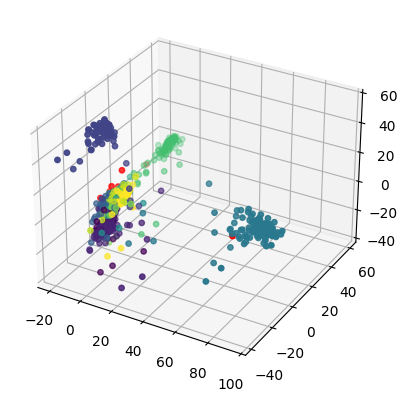

In [39]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_2['PC1'][:-10], pca_df_2['PC2'][:-10], pca_df_2['PC3'][:-10],  c=my_color[:-10] , s=15)
ax.scatter(pca_df_2['PC1'][-10:], pca_df_2['PC2'][-10:], pca_df_2['PC3'][-10:],  c='red' , s=15)
#ax.scatter(pca_df_2['PC1'], pca_df_2['PC2'], pca_df_2['PC3'],  c=my_color, s=15)
# label the axes
#ax.legend()
#ax.set_xlabel("PC1")
#ax.set_ylabel("PC2")
#ax.set_zlabel("PC3")
#ax.set_title("PCA on Z-space")
plt.show()

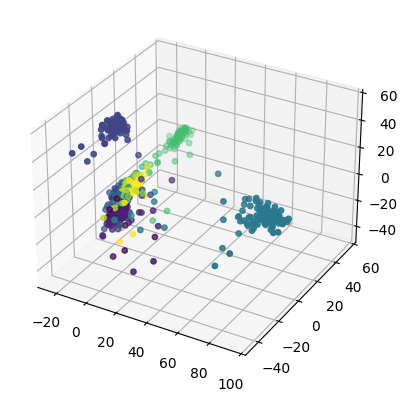

In [40]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_2['PC1'][:-10], pca_df_2['PC2'][:-10], pca_df_2['PC3'][:-10],  c=my_color[:-10] , s=15)
ax.set_xlim3d(-30,100 )
ax.set_ylim3d(-50, 60)
ax.set_zlim3d(-50, 60)
#ax.scatter(pca_df_2['PC1'][-10:], pca_df_2['PC2'][-10:], pca_df_2['PC3'][-10:],  c='red' , s=15)
#ax.scatter(pca_df_2['PC1'], pca_df_2['PC2'], pca_df_2['PC3'],  c=my_color, s=15)
# label the axes
#ax.legend()
#ax.set_xlabel("PC1")
#ax.set_ylabel("PC2")
#ax.set_zlabel("PC3")
#ax.set_title("PCA on Z-space")
plt.show()

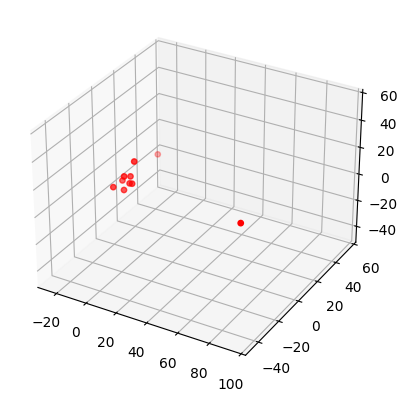

In [41]:
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_2['PC1'][-10:], pca_df_2['PC2'][-10:], pca_df_2['PC3'][-10:],  c='red' , s=15)
ax.set_xlim3d(-30,100 )
ax.set_ylim3d(-50, 60)
ax.set_zlim3d(-50, 60)

#ax.scatter(pca_df_2['PC1'], pca_df_2['PC2'], pca_df_2['PC3'],  c=my_color, s=15)
# label the axes
#ax.legend()
#ax.set_xlabel("PC1")
#ax.set_ylabel("PC2")
#ax.set_zlabel("PC3")
#ax.set_title("PCA on Z-space")
plt.show()